In [2]:
import librosa
import librosa.display
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt

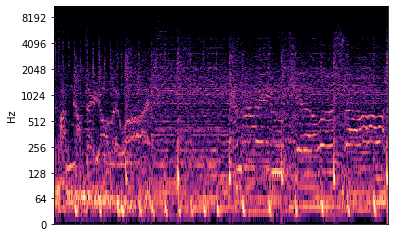

In [10]:
x,sr = librosa.load('../resources/dataset/Audio/processed/5abamRO41fE.wav',sr=44100,mono=True)
S = np.abs(librosa.stft(x[5364460:5616384]))**2
librosa.display.specshow(librosa.amplitude_to_db(S,ref=np.max),y_axis='log')

In [ ]:
df=pd.DataFrame(np.load('../resources/working_data/data.npy',allow_pickle = True),columns=['video_id','start_time','mid_ts','label','audio'])

/home/vkalbag/miniconda3/envs/scream_detection_venv/lib/python3.8/site-packages/librosa/core/spectrum.py:1641: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  warnings.warn(
/home/vkalbag/miniconda3/envs/scream_detection_venv/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/vkalbag/miniconda3/envs/scream_detection_venv/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/vkalbag/miniconda3/envs/scream_detection_venv/lib/python3.8/site-packages/li

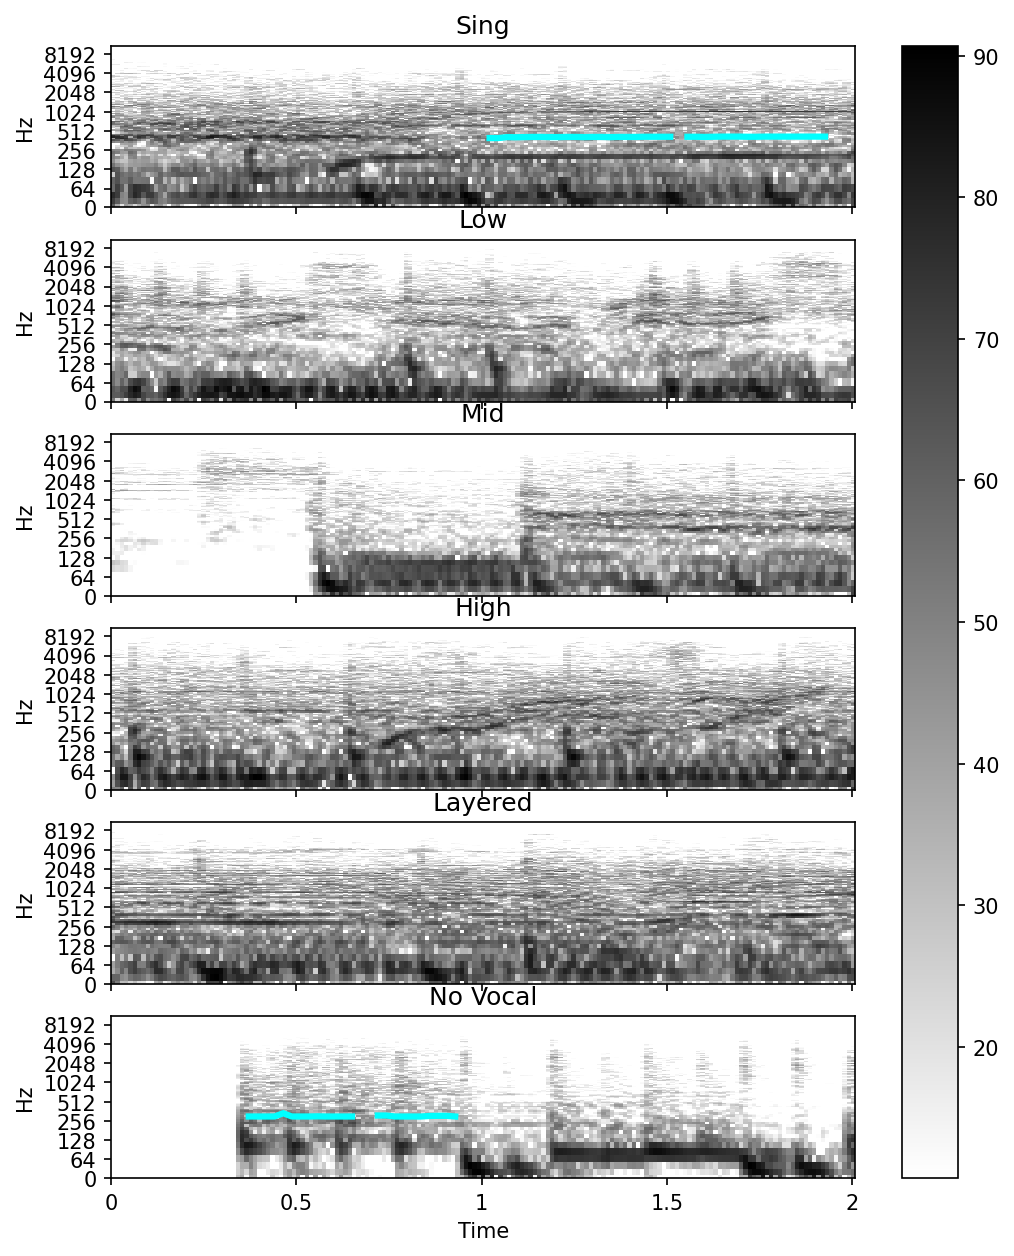

In [9]:
sing = df[df['label'] == 'clean'].reset_index()['audio'].loc[0]
low = df[df['label'] == 'lowfry'].reset_index()['audio'].loc[10]
mid = df[df ['label'] == 'midfry'].reset_index()['audio'].loc[0]
high = df[df['label'] ==  'highfry'].reset_index()['audio'].loc[0]
layered = df[df['label'] == 'layered'].reset_index()['audio'].loc[0]
no_vocal = df[df['label'] ==  'no_vocals'].reset_index()['audio'].loc[0]

nfft=1024
win=nfft
sing_S=librosa.stft(sing,n_fft=nfft,win_length=win)
low_S=librosa.stft(low,n_fft=nfft,win_length=win)
mid_S=librosa.stft(mid,n_fft=nfft,win_length=win)
high_S=librosa.stft(high,n_fft=nfft,win_length=win)
layered_S=librosa.stft(layered,n_fft=nfft,win_length=win)
no_vocal_S=librosa.stft(no_vocal,n_fft=nfft,win_length=win)
# Construct a subplot grid with 3 rows and 1 column, sharing the x-axis)
fig, ax = plt.subplots(nrows=6, ncols=1, sharex=True,dpi=150)
fig.set_size_inches(8, 10)






# We can then even do fancy things like zoom into a particular time and frequency
# region.  Since the axes are shared, this will apply to all three subplots at once.
#ax[0].set(xlim=[1, 3])  # Zoom to seconds 1-3

sing_f0, sing_voiced_flag, sing_voiced_probs = librosa.pyin(sing,300,8000,sr=44100)
low_f0, low_voiced_flag, low_voiced_probs = librosa.pyin(low,300,8000,sr=44100)
mid_f0, mid_voiced_flag, mid_voiced_probs  = librosa.pyin(mid,300,8000,sr=44100)
high_f0, high_voiced_flag, high_voiced_probs  = librosa.pyin(high,300,8000,sr=44100)
layered_f0, layered_voiced_flag, layered_voiced_probs  = librosa.pyin(layered,300,8000,sr=44100)
no_vocal_f0, no_vocal_voiced_flag, no_vocal_voiced_probs  = librosa.pyin(no_vocal,300,8000,sr=44100)

times1 = librosa.times_like(sing_f0)
times2 = librosa.times_like(low_f0)
times3 = librosa.times_like(mid_f0)
times4 = librosa.times_like(high_f0)
times5 = librosa.times_like(layered_f0)
times6 = librosa.times_like(no_vocal_f0)

# On the first subplot, show the original spectrogram
img1 = librosa.display.specshow(librosa.amplitude_to_db(sing_S**2), cmap='gray_r', hop_length=256, x_axis='time', y_axis='log', ax=ax[0])
ax[0].plot(times1, sing_f0, label='f0', color='cyan', linewidth=3)
ax[0].set(title='Sing')

# On the first subplot, show the original spectrogram
img1 = librosa.display.specshow(librosa.amplitude_to_db(low_S**2), cmap='gray_r', hop_length=256, x_axis='time', y_axis='log', ax=ax[1])
ax[1].plot(times2, low_f0, label='low_f0', color='cyan', linewidth=3)
ax[1].set(title='Low')

# On the second subplot, show the mel spectrogram
img2 = librosa.display.specshow(librosa.amplitude_to_db(mid_S**2), cmap='gray_r', hop_length=256, x_axis='time', y_axis='log', ax=ax[2])
ax[2].plot(times3, mid_f0, label='f0', color='cyan', linewidth=3)
ax[2].set(title='Mid')

# On the third subplot, show the chroma features
img3 = librosa.display.specshow(librosa.amplitude_to_db(high_S**2), cmap='gray_r', hop_length=256, x_axis='time', y_axis='log', ax=ax[3])
ax[3].plot(times4, high_f0, label='f0', color='cyan', linewidth=3)
ax[3].set(title='High')

# On the third subplot, show the chroma features
img3 = librosa.display.specshow(librosa.amplitude_to_db(layered_S**2), cmap='gray_r', hop_length=256, x_axis='time', y_axis='log', ax=ax[4])
ax[4].plot(times5, layered_f0, label='f0', color='cyan', linewidth=3)
ax[4].set(title='Layered')

# On the third subplot, show the chroma features
img3 = librosa.display.specshow(librosa.amplitude_to_db(no_vocal_S**2), cmap='gray_r', hop_length=256, x_axis='time', y_axis='log',ax=ax[5])
ax[5].plot(times6, no_vocal_f0, label='f0', color='cyan', linewidth=3)
ax[5].set(title='No Vocal')
# And we can share colorbars:
fig.colorbar(img1, ax=[ax[0], ax[1],ax[2],ax[3],ax[4],ax[5]])
# To eliminate redundant axis labels, we'll use "label_outer" on all subplots:
for ax_i in ax:
    ax_i.label_outer()


In [11]:
high_f0

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [12]:
high_voiced_flag

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [13]:
high_voiced_probs

array([0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.0100008 , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01000001, 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.        , 0.        , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01   